## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

#### 2. Data I Chose
I chose this set of variables because I was interested in exploring any potential relationship between work life to personal life, specifically within partners. I chose variables that involved the respondent's and their partner's job, the respondent's values on certain topics that may affect a marriage/relationship, levels of stress, and family related questions. I also wanted to take into account how the respondent views their life now. I felt that the stress levels due to work may or may not have a connection to unhappiness in a relationship and life in general. Additionally, as just a curious thought, I included the question about a person's past partners to see if it related to their life now.

#### 3. Importing the Data Set

In [6]:
#importing data set 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


print(os.getcwd())

GSS_data = pd.read_csv("../data/GSS.csv")
#print(GSS_data.head())
print(GSS_data.dtypes)

/mnt/c/Users/krngz/OneDrive - University of Virginia/DS 3021 - Analytics/DS3021_repo/EDA/lab
year         int64
id_          int64
hrs2        object
wrkslf      object
spwrkslf    object
hapmar      object
divlaw      object
xmarsex     object
wkvsfam     object
stress      object
relatsex    object
ballot      object
lifenow     object
RBIOPRNT    object
dtype: object


In [51]:
#cleaning data
GSS_data["hrs2"] = pd.to_numeric(GSS_data["hrs2"], errors="coerce")
GSS_data.head()

#cleaning stress variable
stress_mapping = {
    "Often":3,
    "Sometimes":2, 
    "Hardly ever":1
}
print(GSS_data.dtypes)
GSS_data["stress_numeric"] = GSS_data["stress"].map(stress_mapping)
GSS_data_clean = GSS_data.dropna(subset=["hrs2","stress_numeric"])

#cleaning happiness in marriage column and perspectives on divorce laws 
valid_hapmar = ["VERY HAPPY", "PRETTY HAPPY", "NOT TOO HAPPY"]
valid_divlaw = ["Easier", "More difficult", "Stay as is"]
GSS_data_clean = GSS_data[GSS_data["hapmar"].isin(valid_hapmar) & GSS_data["divlaw"].isin(valid_divlaw)]

#cleaning lifenow and work vs family
GSS_data["lifenow"] = pd.to_numeric(GSS_data["lifenow"],errors="coerce")
GSS_data_clean= GSS_data.dropna(subset=["lifenow"])
valid_wkvsfam = ["Often", "Sometimes", "Rarely", "Never"]
GSS_data_clean = GSS_data[GSS_data["wkvsfam"].isin(valid_wkvsfam)&GSS_data["lifenow"].notna()]

#print(GSS_data_clean["xmarsex"].value_counts())

#cleaning relatsex and xmarsex
valid_relatsex = [
    "Yes, the last time i had sex, it was with someone i was in an on-going relationship with",
    "No, the last time i had sex, it was not with someone i was in an on-going relationship with"]
valid_xmarsex= ["ALWAYS WRONG", "ALMST ALWAYS WRG", "SOMETIMES WRONG","NOT WRONG AT ALL"]
GSS_data_clean = GSS_data[GSS_data["relatsex"].isin(valid_relatsex)& GSS_data["xmarsex"].isin(valid_xmarsex)]
#print(GSS_data_clean["wkvsfam"].value_counts())


year                int64
id_                 int64
hrs2              float64
wrkslf             object
spwrkslf           object
hapmar             object
divlaw             object
xmarsex            object
wkvsfam            object
stress             object
relatsex           object
ballot             object
lifenow           float64
RBIOPRNT           object
stress_numeric    float64
hapmar_numeric    float64
dtype: object


#### 4. Visualizations

([<matplotlib.axis.YTick at 0x7f1b9c52ad10>,
 [Text(0, 1, 'Hardly ever'), Text(0, 2, 'Sometimes'), Text(0, 3, 'Often')])

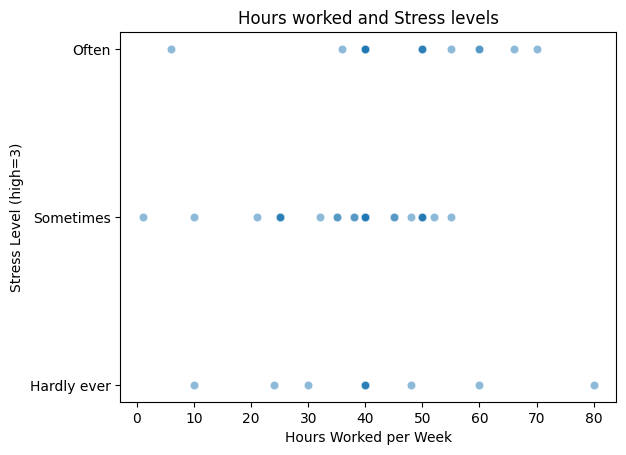

In [30]:
#hours worked and stress levels
sns.scatterplot(data=GSS_data_clean, x="hrs2",y="stress_numeric", alpha=0.5)
plt.xlabel("Hours Worked per Week")
plt.ylabel("Stress Level (high=3)")
plt.title("Hours worked and Stress levels")
plt.yticks([1, 2, 3], ["Hardly ever", "Sometimes", "Often"])

Text(0.5, 1.0, 'Marriage Happiness vs. Views on Divorce Laws')

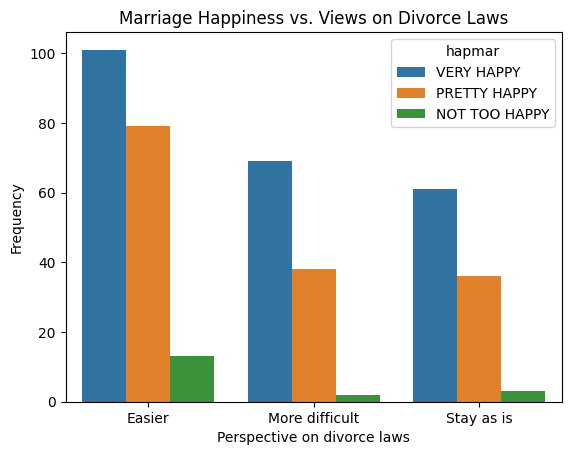

In [35]:
#boxplot of happiness of marriage vs divorce law perspective
sns.countplot(data=GSS_data_clean, x="divlaw", hue="hapmar", order=valid_divlaw)
plt.xlabel("Perspective on divorce laws")
plt.ylabel("Frequency")
plt.title("Marriage Happiness vs. Views on Divorce Laws")


Text(0.5, 1.0, 'Life Satisfaction and Work-Family Interference')

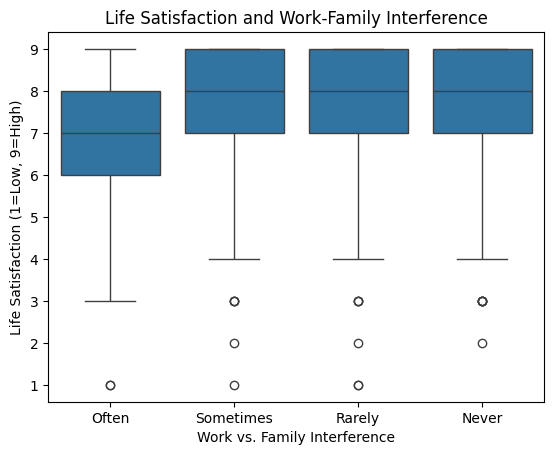

In [48]:
#demands of family interfering with work and life now
sns.boxplot(data=GSS_data_clean, x="wkvsfam", y="lifenow", order=valid_wkvsfam)
plt.xlabel("Work vs. Family Interference")
plt.ylabel("Life Satisfaction (1=Low, 9=High)")
plt.title("Life Satisfaction and Work-Family Interference")

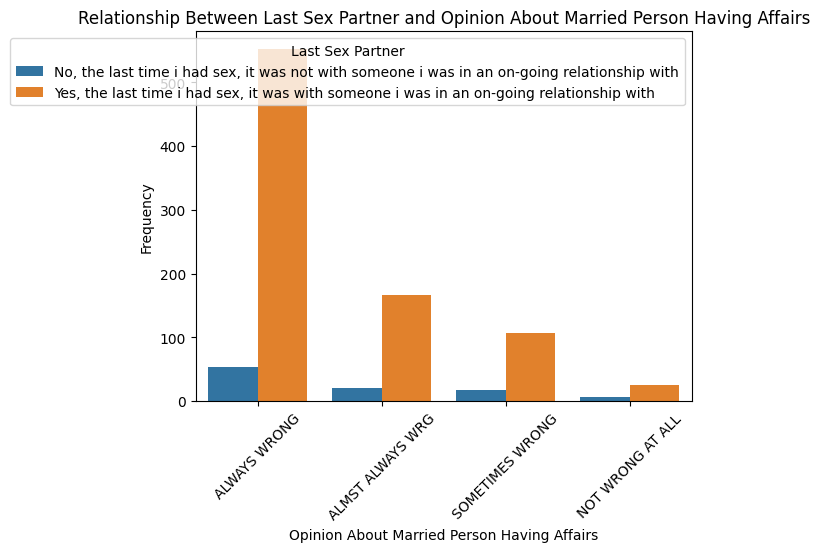

In [54]:
#relationship to last sex partner and opinion about a married person having sexual relations with someone other than the marriage partner
sns.countplot(data=GSS_data_clean, x="xmarsex", hue="relatsex", order=valid_xmarsex)
plt.xlabel("Opinion About Married Person Having Affairs")
plt.ylabel("Frequency")
plt.title("Relationship Between Last Sex Partner and Opinion About Married Person Having Affairs")
plt.xticks(rotation=45)
plt.legend(title='Last Sex Partner')


#### 5. Findings

In my first graph, I found that there is a general relationship with higher hours worked with a higher stress level. This is pretty expected, but there are also varying points of stress plotted at different number of hours worked, so there could be other factors that would be playing in the role of stress.

The second graph did not reveal the information I thought it would. I would hav thought that couples that are not happy in their marriage would want laws that make it easier to get a divorce. This data may not be representative though, since there are a lot more people that are "very happy" or "pretty happy" over "not too happy" in their marriage. By looking at only the graph, it seems taht people that are happy in their marriage want laws that make it easier to get a divorce; however, we have to keep in mind that there are less people that are not too happy in their marriage to start with.

The third graph shows a small pattern that I assumed would appear. It seems that people who feel that work interferes with their family life are slightly less satisfied with where they currenctly are in life. Those with a work-family interference level of "never", "rarely", and "sometimes" all scored themselves similar scores around 7 or above. It is important to note the fact that there are also many more outliers in these categories. Also, it seems that the people that have family-work interference often have the most range in life satisfaction.

The last plot shows the relation of a person's relationship to last sex partner and opinion about a married person having sexual relations with someone other than the marriage partner. Again we have to account for the fact that the majority of people who answered had last had sex with someone they were in a relationship with. If we only focus on the graph, it seemst hat people whose last sexual partner was their spouse or significant other hold more conservative views on marriage affairs, since this is the highest proportion of people saying this behavior is "always wrong."

